In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline    

In [2]:
import scipy.io
data = scipy.io.loadmat('ex5data1.mat')
print data.keys()

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


In [3]:
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

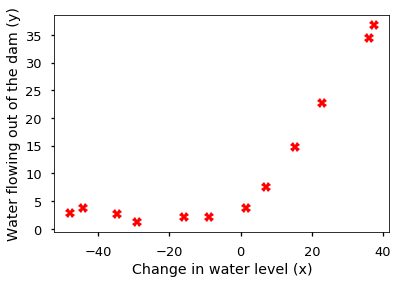

In [4]:
plt.plot(X, y, 'rX');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

In [5]:
def regGrad(theta, *args):
    (X, y, lamb) = args
    m = len(y)
    theta = theta.reshape(-1,1)
    theta_00 = theta.copy()
    theta_00[0] = 0
    g1 = 1./m * np.sum((np.dot(X,theta)-y)*X, axis=0).reshape(-1,1)
    g2 = lamb/m * theta_00
    grad = g1 + g2
    grad = grad.flatten()
    return grad

def regCostJ(theta, *args):
    (X, y, lamb) = args
    m = len(y)
    theta = theta.reshape(-1,1)
    theta_but0 = theta[1:]
    J1 = 1./(2.*m)*np.sum((np.dot(X,theta)-y)**2)
    J2 = lamb/(2.*m)*np.sum(theta_but0**2)
    J = J1+J2
    return J

def linearRegCostFunction(X, y, theta, lamb):
    J = regCostJ(theta, X, y, lamb)
    grad = regGrad(theta, X, y, lamb)
    return J, grad

In [6]:
m = len(X)
theta = np.array([1, 1]).reshape(-1,1)
XX = np.append(np.ones([m, 1]), X, axis=1)
J, grad = linearRegCostFunction(XX, y, theta, 1.0)
print J    ### 303.993192
print grad ### -15.303016; 598.250744

303.9931922202643
[-15.30301567 598.25074417]


In [7]:
import scipy.optimize as opt
def trainLinearReg(X, y, lamb):
    init_theta = np.zeros([X.shape[1], 1])
    theta = opt.fmin_cg(regCostJ, init_theta, fprime=regGrad,
                      maxiter = 200,
                    args=(X, y, lamb), disp=False)
    return theta

In [8]:
lamb = 0.0
theta = trainLinearReg(np.append(np.ones([m,1]), X, axis=1),
                      y, lamb)
print theta

[13.08790351  0.36777923]


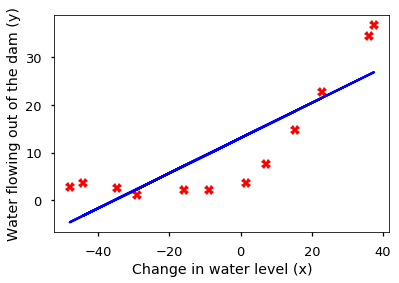

In [9]:
plt.plot(X, y, 'rX');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
theta = theta.reshape(-1,1)
yyy = np.dot(np.append(np.ones([m,1]), X, axis=1), theta)
plt.plot(X, yyy, 'b');

In [20]:
def learningCurve(X, y, Xval, yval, lamb):
    m = len(X)
    error_train = np.zeros([m,1])
    error_val   = np.zeros([m,1])
    
    for i in xrange(m):
        theta = trainLinearReg(X[0:i+1, :], y[0:i+1], lamb)
        error_train[i, 0], grad = linearRegCostFunction(
            X[0:i+1, :], y[0:i+1], theta, 0.0)
        error_val[i, 0], grad = linearRegCostFunction(
            Xval, yval, theta, 0.0)
    
    return error_train, error_val

In [21]:
lamb = 0.0
XX = np.append(np.ones([m, 1]), X, axis=1)
XXval = np.append(np.ones([len(Xval), 1]), Xval, axis=1)
error_train, error_val = learningCurve(XX, y,
                                      XXval, yval, lamb)
print '# Error As Different Training Examples'
disparr = np.append(error_train, error_val, axis=1)
disparr = np.append(np.arange(1,m+1).reshape(-1,1),
                    disparr, axis=1)
print disparr

# Error As Different Training Examples
[[  1.           0.         205.12109575]
 [  2.           0.         110.30036611]
 [  3.           3.28659505  45.01023181]
 [  4.           2.84267769  48.36891137]
 [  5.          13.15404881  35.86514112]
 [  6.          19.44396251  33.82995682]
 [  7.          20.09852166  31.97098678]
 [  8.          18.1728587   30.86244632]
 [  9.          22.60940542  31.13599796]
 [ 10.          23.26146159  28.93620747]
 [ 11.          24.31724959  29.55143162]
 [ 12.          22.3739065   29.43381813]]


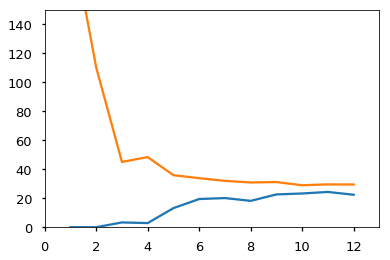

In [22]:
plt.plot(np.arange(1, m+1), error_train);
plt.plot(np.arange(1, m+1), error_val);
plt.axis([0, 13, 0, 150]);